SAS & HSE, Applied Time Series Forecasitng , Winter 2022 

<font color="blue"> HW #2 </font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание в гугл-форму: https://forms.gle/G9e9L3ue3cFhNppf7
- Выполненное дз сохраните в файл Surname_w2022_23_hw2.ipynb, например, ivanov_w2022_23_hw2.ipynb

**Вопросы**:
- Присылайте вопросы в slack в соответствующий канал

**Deadline**: <font color="red"> 10-Jan-2023 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле

$$МаксимальныйБалл=\max\bigl(3,max(0,(10-ДнейПослеДедлайна/7))) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже: 

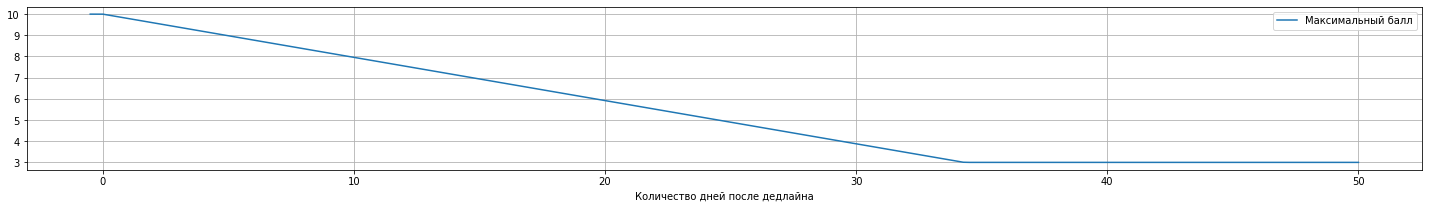

In [3]:
import pandas as pd
import numpy as np
a = 2
ax = pd.DataFrame(data = [[x, min(10, 10*max(0.3, (1-x/49)))] for x in np.linspace(-0.5,50,200)], columns = ['Количество дней после дедлайна', 'Максимальный балл']).set_index('Количество дней после дедлайна').plot(figsize = (25,3), grid = True)

<h1 align="center">Check Questions (5%)</h1> 


**Questions 1: Write down an equation for $y_t$ (in a form $y_t=f\left(y_{t-1}, \ldots,y_{t-n}, \varepsilon_t, \ldots, \varepsilon_{t-m}\right)$)  that corresponds to the following ARIMA models**:
 - 1) ARIMA $(p=0,d=k,q=1)$,
    - <Answer>
    <br></br>
 - 2) ARIMA $(p=0,d=k+1,q=1)(P=1, D=1, Q=0)_s$,   
     - <Answer>
    <br></br>


<h1 align="center"> Practice</h1>

<h2 align="center">  1. Download data for following data sets (15%)</h2>


* 0) Download data
  <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> 
  
  description of the target ts you can find here  https://docs.google.com/spreadsheets/d/1HwwDZMCVUl-wpdY39TdBBKMwvks9VTe2gIpFtGBu-28/edit#gid=1251818784 </span> sheet "TS" in column O

* 1) plot target ts 
* 2) plot cros-series plot: independent variables and target variable on the same subplot 
* 3) answer the questions: 
    - is there seasonality? If there is seasonality then define period(s) of seasonality.
    - trend?
    - not-stable dispersion? 
* 4) define the proper list of transformations in order to make thet ts stationary (find optimal lambda in Box-Cox tranformation, if needed). 

In [ ]:
# Put your code here

<h2 align="center">2. Fit ARIMA Model (50%) </h2>

**I. Build ARIMA forecast manually ** 

You should follow the next scheme:

 * 0) split the ts to two parts: first 80% of timestamps (ts1) and the last 20% of timestamps (ts2)   
 * 1) apply transformation to make the ts1 stationary;
 * 2) define exogenous variables and apply the transformations to them, if needed
 * 3) train simple ARIMA (0, 0, 0) with exogenous variables only, endog = 1) exog = 2);
 * 4) plot ACF/PACF for resifuals of the simple ARIMA(0, 0, 0) in order to understand which $p, P, q, Q$ can be used; define set of candidate parameters for ARMA (for the train TS);
 * 5) select the best parameters of the ARIMA models iteratively: 
    * While there are significant ACF/PACF lags and ARIMA can be trained
      - change only one of 6 ARIMA parameters (p, d, q, P, D, Q) 
      - compare the new model with the previous best model based on  AIC|BIC|HQIC
      - plot ACF/PACF of the best model

  **Note**: there is no goal to minimize AIC|BIC|HQIC, the goal is to exclude all significant autocorrelations from ACF/PACF.

* 6) Check  the best model residuals for 
    - unbiasedness, 
    - stationarity
    - non-autocorrelation
    - white noise hypothesis

    If all tests fail you need to review your choice.
* 7) Run analysis of the regression coafficients
    
    - if there are some insignificant regressors that can be eliminated, please exclude them from the model.

* 8) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 9) Calculate loss MAPE of your forecast. Does the forecast look appropriate?

In [ ]:
# Put your code here

<h2 align="center">2. Find the best ARIMA Model automatically (30%) </h2>

* 0) define candidates for $p, d, q, P, D, Q$ values  
* 1) Run grid search for ARIMA parameters (use ts1 from the previous section) according to AIC|BIC|HQIC, feel free to use your own approach how to define the best model based on AIC|BIC|HQIC. How many time does it take to fit all ARIMA?
* 2) Run Residuals and Coefficint analysis for the best model
  - If all tests fail you need to rebuild automatically selected model (you can do it manually).
  - if there are some insignificant regressors that can be eliminated, please exclude them from the model.
* 3) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 4) Calculate loss MAPE of your forecast. Which model manually generated or automatically generated is better?

In [ ]:
# Put your code here

<h1 align="center"> Theoretical Bonus Part (Extra 50%)</h1>

<br></br>





**1. Let's consider simple AR model:** 
$$AR(p)\colon \;\;\; y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t,$$  

where 
  - $y_t$ is a stationary time series with zero average,
  - $\phi_1,\dots,\phi_p$ are constants ($\phi_q \neq 0$), $~~$
  - $\varepsilon_t$ is gaussian white noise with zero average and constant dispersion $\sigma_\varepsilon^2.$
<br></br>
Proof that partial autocorrelation coefficients depend on $p$ and $\tau$ only:
   $$rr_{\tau} = {\bf{E}}[y_t-\hat y_t, y_{t+\tau} - \hat y_{t+\tau}]= \begin{cases}0 &, \tau>p; \\ f(\tau, p)>0 &, 1\leq\tau\leq p. \end{cases}$$
	
  where $\hat y_t$ - forecast of $y_t$ with following regression model $$y_t = \sum_{j=1}^{\tau-1}\beta_j y_{t+j}$$
  $\hat y_{t+\tau}$ - forecast of $y_{t+\tau}$ with following regression model $$y_{t+\tau} = \sum_{j=1}^{\tau-1}\gamma_j y_{t+j}.$$

<br></br>
<Answer>



**2. Let's consider simple MA model:**
  $$MA(q)\colon \;\;\; y_t = \varepsilon_t + \theta_1\varepsilon_{t-1} + \theta_2\varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q},$$
  where 
  - $y_t$ is a stationary time series with zero average,$~~$
  - $\theta_1,\dots,\theta_q$ are constants ($\theta_q \neq 0$),$~~$ 
  - $\varepsilon_t$ is gaussian white noise with zero average and constant dispersion $\sigma_\varepsilon^2.$


Proof that the correlation coefficients depend on $\tau$ and $q$
$$r_\tau=\begin{cases}0 &, \tau>q; \\ f(\tau,q)>0 &, \tau\leq q. \end{cases}$$

<br></br>
<Answer>

**3. How to select candiates for $p$ and $q$ parameters for simple ARMA model based on ACF and PACF.**

<h1 align="center"> Practical Bonus Part (Extra 50%)</h1>

Realize method for searching optimal $\lambda$ for boxcox transformation.
Approach for finding the optimal $\lambda$ is descibed <a href="https://www.academia.edu/23049010/Time_series_analysis_supported_by_power_transformations">here</a>.  

You need to replace all 'TODO' below by some code:

In [ ]:
import numpy as np
class boxcox():
    def __init__(self, lmbda=None, shift=0):
        '''
    Box Cox Transforms
    Transforms data are to be normal. Also known as power transform.
    
    Parameters
        ----------
    lmbda: float or None
        lmbda the power parameter. The None input automatically calculates
        lmbda based on method guerrero
    shift: float
        Use to normalize data by shifting data to all positive values
        
        '''
        self.lmbda = lmbda
        self.shift = shift
        self.y = []
        self.method = 'guerrero'
        
    def transform(self, x, n=2):
        '''
            x: time series
            n: number of subseries with constant dispersion
        '''
        x = 1.0*np.asarray(x)
        
        if self.shift>0:
            x=  'TODO: shift time series up'
            
        if self.lmbda is None:
            self.lmbda = 'TODO: shift time series up'
            
        
            
        if self.lmbda == 0:
            self.y = 'TODO: '
        else:
            self.y = 'TODO: '
        return self.y, self.lmbda
        
    def optimal_lambda(self,x, n=2):
        """
        Parameters
        ----------
        x - time series with different variance through the time
        n - number of subseries in x, each subseries x_i has constant variance sigma_i and constant mean m_i
        The method states, that optimal lambda should be chosen in such a way that
         
         sigma_i/(m_i)**(1-lambda) = constant, for all i=1,...,n
        
        you need to find solution for the follow Regression problem:
        
        log(sigma_i) = w_1 + w_2*log(m_i), where
        w_2 = 1-lambda
        
        """
        x = 1.0*np.asarray(x)
               
        sigma = 'TODO: initialize array for log(sigma_i)'
        m = 'TODO: initialize array for matrix of regression [1, log(m_i)]'

        r = len(x)/n  # the length of each subseries

        for i in range(n):
            m[1][i] = 'TODO: fill matrix of regression'
            sigma[i] = 'TODO: fill array of sigma'

        # find the solution for regression Xw=y, where X = m, w[1] = 1-lambda, 
        w = np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,y))[1]
        
        self.lmbda = 'TODO: set value of lambda'
        
        print self.lmbda
        
        return self.lmbda

    def inverse(self, y=None):
        """
        Parameters
        ----------
        y: time series

        Returns
        -------
        x: inverse transformed ts
    
        """
        if y is None:
            y = self.y
        
        if self.lmbda == 0:
            x = 'TODO' 
        else:
            x = 'TODO'
        return x

In [ ]:
# Check on Wage data
# boxcox transformation for wage dataset 
ts_wage = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/33b78c9be63831567f8036ad40c5859e824d30f7/data/monthly-wage.csv', sep=';', decimal='.', parse_dates=True, index_col='Month')

In [ ]:
# cut first steps
ts_wage = ts_wage.ix['01.01.1999':'01.01.2017']
ts_wage.plot(figsize=(25,5))

In [ ]:
bc = boxcox()
ts_wage['wage_boxcox'], lmbda = bc.transform(ts_wage['Real wage'],n=18)
print ('lambda=', lmbda)
ts_wage['wage_boxcox'].plot(figsize=(15,5))